**Part 1 :**

In [ ]:
import numpy as np  # Importer la bibliothèque NumPy pour manipuler des tableaux et effectuer des calculs numériques
import matplotlib.pyplot as plt  # Importer Matplotlib pour créer des graphiques

In [ ]:
# Générer un tableau de valeurs linéaires entre -1 et 1
# np.linspace crée un tableau de 10 valeurs espacées de manière égale dans l'intervalle [-1, 1]
x = np.linspace(-1, 1, 10)

In [ ]:
# Définir un tableau des coefficients 'beta' pour une fonction quadratique
# beta[0] correspond au terme constant, beta[1] au coefficient du terme linéaire (x),
# et beta[2] au coefficient du terme quadratique (x^2)
beta = [.1, .1, 1]

In [ ]:
# Générer des valeurs de la fonction quadratique avec du bruit aléatoire ajouté
# L'expression beta[0] + beta[1]*x + beta[2]*x**2 représente une parabole
# np.random.normal(0, .1, len(x)) ajoute du bruit gaussien avec une moyenne de 0 et un écart-type de 0.1
tnoisy = beta[0] + beta[1]*x + beta[2]*x**2 + np.random.normal(0, .1, len(x))

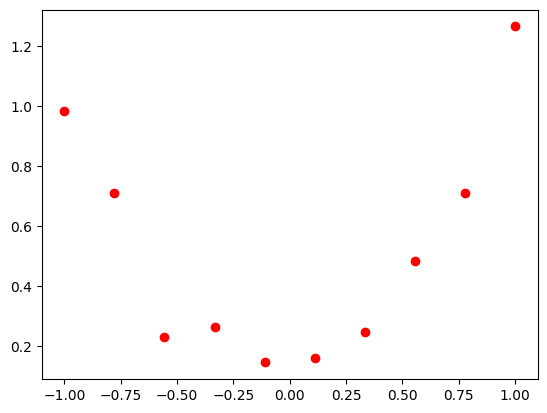

In [ ]:
# Créer un graphique en nuage de points avec les valeurs de x sur l'axe des abscisses et tnoisy sur l'axe des ordonnées
# Les points sont de couleur rouge (c='r')
plt.scatter(x, tnoisy, c='r')

# Afficher le graphique à l'écran
plt.show()

**Part 2 :**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  # Importer PolynomialFeatures pour générer des polynômes

In [ ]:
# Créer une instance de PolynomialFeatures de degré 2
# Cela permet de créer des caractéristiques polynomiales jusqu'au degré 2 (x, x^2)
my_poly = PolynomialFeatures(2)

In [ ]:
# Utiliser les données x_train (qui sont x dans notre cas)
x_train = x  # On réutilise x défini précédemment

In [ ]:
# Transformer x_train en ajoutant les termes polynomiaux
# fit_transform transforme x_train en une matrice contenant les colonnes [1, x, x^2]
Xpoly_train = my_poly.fit_transform(x_train.reshape(-1, 1))  # reshape(-1,1) transforme x en un vecteur colonne

In [ ]:
from sklearn.linear_model import LinearRegression  # Importer LinearRegression pour effectuer une régression linéaire

In [ ]:
# Créer un modèle de régression linéaire et l'ajuster aux données transformées
# fit ajuste le modèle sur les données polynomiales (Xpoly_train) et les valeurs cibles tnoisy
reg = LinearRegression().fit(Xpoly_train, tnoisy)

In [ ]:
# Générer de nouvelles données test (xtest) uniformément réparties entre -1 et 1 avec 100 points
xtest = np.linspace(-1, 1, 100)

In [ ]:
# Transformer xtest en caractéristiques polynomiales (x, x^2)
# Cela permet de prédire à partir du modèle polynomiale entraîné
Xpoly_test = my_poly.fit_transform(xtest.reshape(-1, 1))

In [ ]:
# Faire des prédictions avec le modèle ajusté
# predict utilise le modèle ajusté pour prédire les valeurs des données test polynomiales
prediction = reg.predict(Xpoly_test)

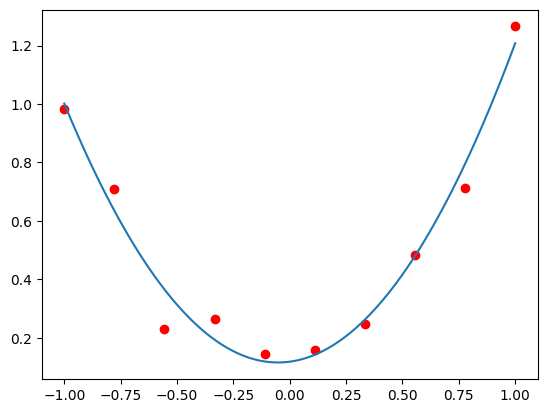

In [ ]:
# Tracer la courbe de la prédiction sur les données xtest
plt.plot(xtest, prediction)  # La ligne montre la prédiction du modèle

# Afficher les points d'entraînement bruités (tnoisy) en rouge pour comparaison
plt.scatter(x, tnoisy, c='r')

# Afficher le graphique avec la courbe de régression et les points d'entraînement
plt.show()